In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from training import confusion_matrix_count
from dataloading import ShapesDataset
from model import ConvNeuralNet


C:\Users\16kin\anaconda3\envs\ml_base\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\16kin\anaconda3\envs\ml_base\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(42)
np.random.seed(42)

batch_size = 16
dataset_name = 'CircSqrTriRecElp_BonW'
num_models = 4
model_save_freq = 50
report_freq = 10


csv_path = '../data/%s/%s_labels.csv'%(dataset_name, dataset_name)
len_dataset = len(pd.read_csv(csv_path))
train_size = int(0.7 * len_dataset)
val_size = int(0.1 * len_dataset)
test_size = int(0.2 * len_dataset)

print('lengths of \n Dataset: {}, Train: {}, Validation: {} ,Test: {}'.format(len_dataset,train_size,val_size,test_size))

dataset = ShapesDataset(csv_file = csv_path, nrows=None, device=device)

train_val_set,test_set =  torch.utils.data.random_split(dataset,[train_size+val_size,test_size])
train_set,val_set =  torch.utils.data.random_split(train_val_set,[train_size,val_size])

train_loader = DataLoader(dataset = train_set,batch_size=16,shuffle = True)
val_loader = DataLoader(dataset = val_set,batch_size=16,shuffle = True)
test_loader = DataLoader(dataset = test_set,batch_size=16,shuffle = True)

print('Loaded!')

lengths of 
 Dataset: 50000, Train: 35000, Validation: 5000 ,Test: 10000
Loaded!


In [3]:
len(test_loader)

625

In [4]:
model_name = 'Circ_BonW_model4'
model = torch.load('models/%s/%s.pth'%(model_name, model_name))

cm = confusion_matrix_count(model, test_loader)

In [5]:
max_pred = max([max(val) for val in cm.values()])
min_pred = min([min(val) for val in cm.values()])

top = max(10, max_pred)
bot = min(1, min_pred)

cmarr = np.zeros((10, top-bot+1))
for lab in range(10):
    for pred in range(top-bot+1):
        cmarr[lab][pred] = cm[lab+1][pred+bot]
        
acc = sum([cmarr[i][i-bot+1] for i in range(10)]) / np.sum(cmarr)
print('Accuracy:', acc)

cmarr_scaled = np.zeros((10, top-bot+1))
for lab in range(10):
    for pred in range(top-bot+1):
        cmarr_scaled[lab][pred] = cmarr[lab][pred] / sum(cmarr[lab])

# # for label in range(1, 11):
# #     for pred, count in cm[label].items():
# #         cmarr[label-1][pred-min_pred] = count

# acc = sum([cmarr[i][i - min_pred] for i in range(10)]) / np.sum(cmarr)
# print('Accuracy:', acc)

# cmarr_scaled = np.zeros((10, max(max_pred - min_pred + 1, 10)))
# for label in range(1, 11):
#     for pred in range(len(cmarr[label-1])):
#         cmarr_scaled[label-1][pred] = cmarr[label-1][pred] / sum(cmarr[label-1])

Accuracy: 0.3236


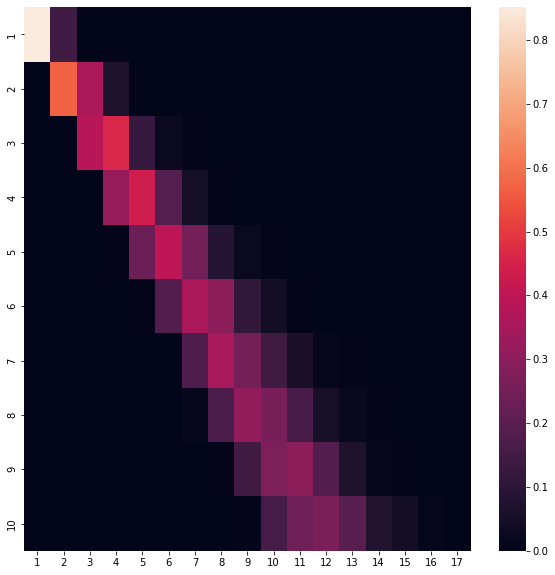

In [7]:
plt.figure(figsize=(10,10))
sbn.heatmap(cmarr_scaled, xticklabels=range(min_pred, max(max_pred+1, 11)), yticklabels=range(1,11), annot=False)
plt.show()